In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

#Remove the warning
import warnings
warnings.filterwarnings("ignore")

# Load tips dataset
tips = sns.load_dataset('tips')


# Preprocessing
# Converting categorical variables to dummy variables
tips = pd.get_dummies(tips, drop_first=True)

# Selecting features and target (predicting 'tip' based on other features)
X = tips.drop('tip', axis=1)
y = tips['tip']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 9.8709 - val_loss: 6.0646
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9.1236 - val_loss: 5.5638
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.9859 - val_loss: 5.0905
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.9705 - val_loss: 4.6587
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 7.7360 - val_loss: 4.2487
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 6.6094 - val_loss: 3.8833
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 6.1464 - val_loss: 3.5446
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.5774 - val_loss: 3.2516
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.0530 - val_loss: 2.9960
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4.4993 - val_loss: 2.7614
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 4.0077 - val_loss: 2.5536
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.5510 - val_lo

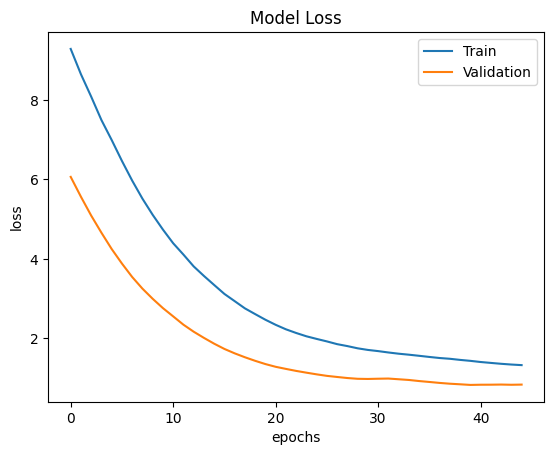

In [7]:
#Build the model
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(10,activation="relu",input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(5,activation="relu"),
    tf.keras.layers.Dense(1)
])

#Compile the model
model.compile(optimizer="adam",loss="mean_squared_error")

#Define the call back function
early_stopping =EarlyStopping(patience=5,
                             min_delta=0.001,
                             restore_best_weights=True)
#cb=EarlyStopping(patience=5)
#Train the  model with call back fuction
history=model.fit(X_train,y_train,epochs=100,batch_size=32,verbose=1,validation_data=(X_test,y_test),
                  callbacks=[early_stopping])

#Evaluate the model
mse=model.evaluate(X_test,y_test,verbose=0)
print("Mean squared error ",mse)

#Ploting the training and testing dataset
plt.plot(history.history['loss'])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["Train ","Validation"],loc="upper right")
plt.show()


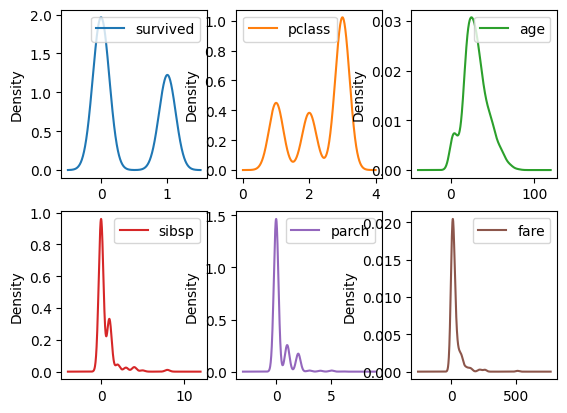

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
data=sns.load_dataset("titanic")
data.plot(kind='density', subplots=True, layout=(2,3), sharex=False)
plt.show()
